In [5]:
import numpy as np

In [6]:
datas = [1, 2, 3] # accually, we use proper dataset; MNIST, CIFER, etc...

In [7]:
from numpy import ndarray


def sample_real_data(m: int):
    return np.random.normal(loc=2.0, scale=2.5, size=(m, 1))

def sample_noise_data(m: int):
    return np.random.uniform(low=0, high=1, size=(m, 1))

def generator(z, theta_g):
    a, b = theta_g
    return a*z + b


def discriminater(x, theta_d):
    w, b = theta_d
    return 1/(1 + np.exp(-w*x + b))

def update_discriminater(theta_d, theta_g, m, lr=0.1):
    w, b = theta_d
    x = sample_real_data(m)
    z = sample_noise_data(m)
    g_z = generator(z, theta_g)

    D_real = discriminater(x, theta_d)
    D_fake = discriminater(g_z, theta_d)


    # gradients (d/dw, d/db)
    grad_w = np.mean((1 - D_real) * x - D_fake * g_z)
    grad_b = np.mean((1 - D_real) - D_fake)

    w += lr * grad_w
    b += lr * grad_b

    return (w, b)

def update_generator(theta_d, theta_g, m, lr=0.1):
    a, b = theta_g
    z = sample_noise_data(m)
    g_z = generator(z, theta_g)

    D_fake = discriminater(g_z, theta_d)

    grad_a = np.mean((1 - D_fake) * z)
    grad_b = np.mean((1 - D_fake))

    a += lr * grad_a
    b += lr * grad_b

    return (a, b)
    

# まずは整数配列をデータとして一時的に使う
# Args
# m: a size of minibatch
# k: a number of training steps
def learn(m: int, k: int):
    theta_d = (np.random.randn(), np.random.randn())
    theta_g = (np.random.randn(), np.random.randn())

    for step in range(k):
        theta_d = update_discriminater(theta_d, theta_g, m)
        theta_g = update_generator(theta_d, theta_g, m)
    
        if step % 100 == 0:
            print(f"Step: {step}, theta_d: {theta_d}, theta_g: {theta_g}")




In [8]:
learn(m=64, k=10000)

Step: 0, theta_d: (np.float64(-1.1098005578607135), np.float64(2.149727009907218)), theta_g: (np.float64(1.8720111310202179), np.float64(-2.0112485017510093))
Step: 100, theta_d: (np.float64(0.8261072150191667), np.float64(8.530747310781743)), theta_g: (np.float64(5.4635686630955655), np.float64(5.9264875353264435))
Step: 200, theta_d: (np.float64(0.7793310693692146), np.float64(17.22216614434911)), theta_g: (np.float64(9.491890399972316), np.float64(14.698228534012333))
Step: 300, theta_d: (np.float64(0.6616859255869654), np.float64(26.50267674236205)), theta_g: (np.float64(13.903135666524241), np.float64(24.00545463943041))
Step: 400, theta_d: (np.float64(-0.5266804611859435), np.float64(35.99688850240384)), theta_g: (np.float64(18.450904217945727), np.float64(33.50707535624684))
Step: 500, theta_d: (np.float64(-0.7946021962168913), np.float64(45.61986418392503)), theta_g: (np.float64(23.146807530809497), np.float64(43.16917245472272))
Step: 600, theta_d: (np.float64(0.07501663349229

/var/folders/32/43mz61m91r5bpwyk7t6wlv0r0000gn/T/ipykernel_77655/3461067476.py:17: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-w*x + b))


In [1]:
import os
print(os.getcwd())

/Users/ken702/src/github.com/frinfo702/research-experiment/GAN/src


Epoch [1/30] | D loss: 0.3454 | G loss: 1.3298
Epoch [2/30] | D loss: 0.2675 | G loss: 1.8303
Epoch [3/30] | D loss: 0.3077 | G loss: 1.6727
Epoch [4/30] | D loss: 0.3627 | G loss: 1.9881
Epoch [5/30] | D loss: 0.3436 | G loss: 1.7406


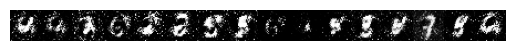

Epoch [6/30] | D loss: 0.4006 | G loss: 2.6804
Epoch [7/30] | D loss: 0.3555 | G loss: 2.0551
Epoch [8/30] | D loss: 0.3547 | G loss: 1.4660
Epoch [9/30] | D loss: 0.4534 | G loss: 1.1315
Epoch [10/30] | D loss: 0.5196 | G loss: 2.0217


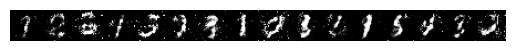

Epoch [11/30] | D loss: 0.4845 | G loss: 1.1270
Epoch [12/30] | D loss: 0.5391 | G loss: 1.6223
Epoch [13/30] | D loss: 0.4768 | G loss: 1.2663
Epoch [14/30] | D loss: 0.6206 | G loss: 0.5419
Epoch [15/30] | D loss: 0.5420 | G loss: 1.8713


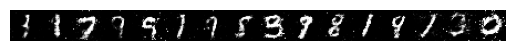

Epoch [16/30] | D loss: 0.5210 | G loss: 0.8432
Epoch [17/30] | D loss: 0.5282 | G loss: 1.2818
Epoch [18/30] | D loss: 0.5139 | G loss: 0.7953
Epoch [19/30] | D loss: 0.6070 | G loss: 0.7452
Epoch [20/30] | D loss: 0.5811 | G loss: 1.8690


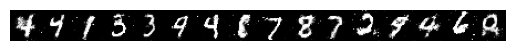

Epoch [21/30] | D loss: 0.5758 | G loss: 1.0788
Epoch [22/30] | D loss: 0.5070 | G loss: 0.8164
Epoch [23/30] | D loss: 0.5507 | G loss: 1.5589
Epoch [24/30] | D loss: 0.5313 | G loss: 0.8798
Epoch [25/30] | D loss: 0.5439 | G loss: 0.9346


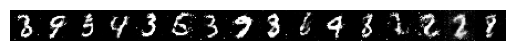

Epoch [26/30] | D loss: 0.5480 | G loss: 0.8056
Epoch [27/30] | D loss: 0.5201 | G loss: 1.5913
Epoch [28/30] | D loss: 0.5467 | G loss: 1.1549
Epoch [29/30] | D loss: 0.5088 | G loss: 1.3530
Epoch [30/30] | D loss: 0.4689 | G loss: 1.3973


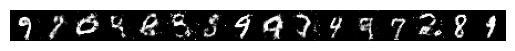

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

latent_dim = 20   # size of noise z (latent variable)
img_size = 28 * 28
batch_size = 128
lr = 0.0003
epochs = 30

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, img_size),
            nn.Tanh()
        )
    def forward(self, z):
        return self.net(z)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(img_size, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid() # 正解である確率を出したい
        )
    def forward(self, x):
        return self.net(x)

G = Generator()
D = Discriminator()

criterion = nn.BCELoss()
optimizer_D = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_G = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))

def learn(m: int, k: int, datas):
    for epoch in range(k):
        for idx, (imgs, _) in enumerate(datas):
            real_imgs = imgs.view(-1, img_size)
            batch_size = real_imgs.size(0)

            #  Train Discriminator
            z = torch.randn(batch_size, latent_dim)
            fake_imgs = G(z).detach()

            real_labels = torch.ones(batch_size, 1)
            fake_labels = torch.zeros(batch_size, 1)

            D_real = D(real_imgs)
            D_fake = D(fake_imgs)

            loss_D_real = criterion(D_real, real_labels)
            loss_D_fake = criterion(D_fake, fake_labels)
            loss_D = (loss_D_real + loss_D_fake) / 2

            optimizer_D.zero_grad()
            loss_D.backward()
            optimizer_D.step()

            #  Train Generator
            z = torch.randn(batch_size, latent_dim)
            fake_imgs = G(z)
            D_fake = D(fake_imgs)
            loss_G = criterion(D_fake, real_labels)  # want D(fake)=1

            optimizer_G.zero_grad()
            loss_G.backward()
            optimizer_G.step()

        print(f"Epoch [{epoch+1}/{k}] | D loss: {loss_D.item():.4f} | G loss: {loss_G.item():.4f}")

        if (epoch + 1) % 5 == 0:
            show_generated(G)

def show_generated(G):
    z = torch.randn(16, latent_dim)
    with torch.no_grad():
        gen_imgs = G(z).view(-1, 1, 28, 28)
    grid = torch.cat([gen_imgs[i] for i in range(16)], dim=2)
    plt.imshow(grid.permute(1, 2, 0).squeeze().cpu().numpy(), cmap="gray")
    plt.axis("off")
    plt.show()

learn(m=batch_size, k=epochs, datas=loader)
